___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Advertisements Logistic Regression Project 

In this project I will apply a Logistic Regression model to advertisements data with the aim to determine if a consumer clicked on an ad or not.  These predictions are based on the features of the users. We will be working with made up data.

In this project I use the following libraries and toolkits: Scikit-learn, Seaborn, Matplotlib, Pandas and Datetime.

#### Some interesting analyses and interpretations from visualizations in this project:  

* The ages of consumers that click on ads vary from young to older people and consumers that click on ads tends to come from a variety of areas.  Consumers that do not click on ads tend to come from areas with a higher average income.
* Consumers who click on ads, in general, spend less time on a site and on the internet than those who do not click on an ad.
* The Logistic Regression model predicts whether a consumer clicked on an ad with an accuracy of 98%.

This project was done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy (Python for Data Science and Machine Learning Bootcamp).

**Data set features:**
* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Viewing the Data

In [1]:
import pandas as pd
import numpy as np
import sklearn as scikit_learn
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
advertising = pd.read_csv('advertising.csv')

In [3]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
# We have 1000 entries, no null values and 4 of the 10 columns are of the 'object' type.  The other 6 are numerical. 

In [6]:
advertising.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

**Create a histogram of the Age variable.**

C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(10.0, 70.0)]

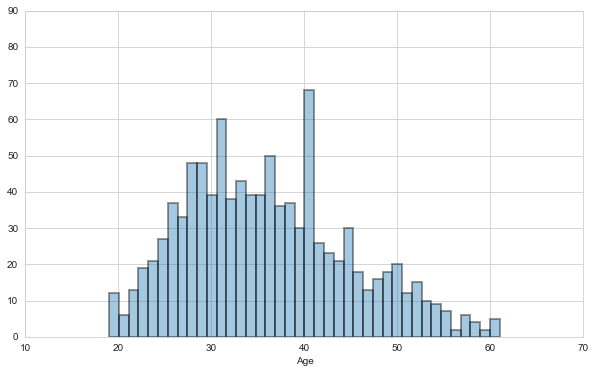

In [7]:
plt.figure(figsize = (10,6))
f = sns.distplot(advertising['Age'], kde = False, bins = 40, hist_kws= dict(edgecolor='black', linewidth= 2))
f.set(ylim = (0, 90))
f.set(xlim = (10, 70))

In [8]:
# In the descriptive statistics we can see that 50% of the Internet users Ages are between 29 and 42. 
# There are less Internet users as the Age increases.
# The greatest peak in the data is Internet users that are 40-42.

**Create a jointplot showing Area Income versus Age.**

(10000.0, 90000.0)

<Figure size 720x576 with 0 Axes>

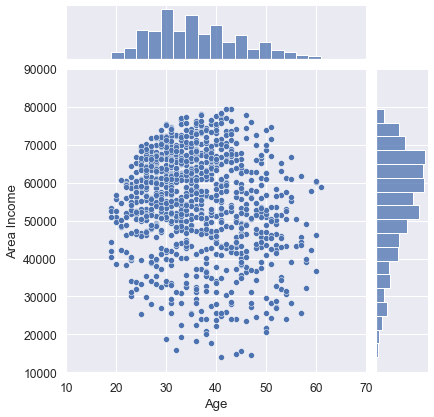

In [9]:
plt.figure(figsize = (10,8))
sns.set(font_scale =1.1)
f = sns.jointplot(data = advertising, x= 'Age', y= 'Area Income', kind = 'scatter')
f.ax_joint.set_xlim((10,70))
f.ax_joint.set_ylim((10000, 90000))

In [10]:
# For people between the ages of 22 and 43, most of areas in which theya are situated have an average area incomes of between
# 50 000 dollars and 72 000 dollars

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

In [11]:
sns.set_style('whitegrid')

<Figure size 720x576 with 0 Axes>

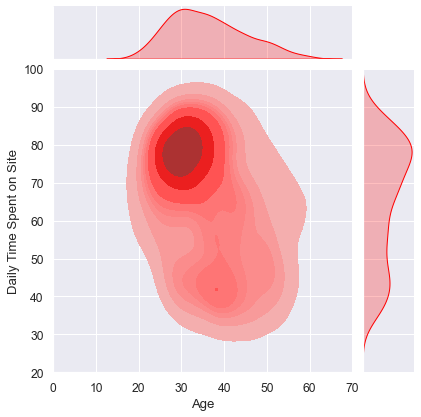

In [12]:
plt.figure(figsize = (10,8))
sns.set(font_scale =1.1)
j = sns.jointplot(data = advertising, x= 'Age', y= 'Daily Time Spent on Site', kind = 'kde', shade= True, color= 'Red',
                  joint_kws= dict(levels= 9), marginal_kws= dict(shade= True))
j.ax_joint.set_xlim((0,70))
j.ax_joint.set_ylim((20, 100));

In [13]:
# Most internet users between the ages 26 and 35 spend on average 72-85 min
# on the Internet per day.  (What the dark red circle at the centre represent.)

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

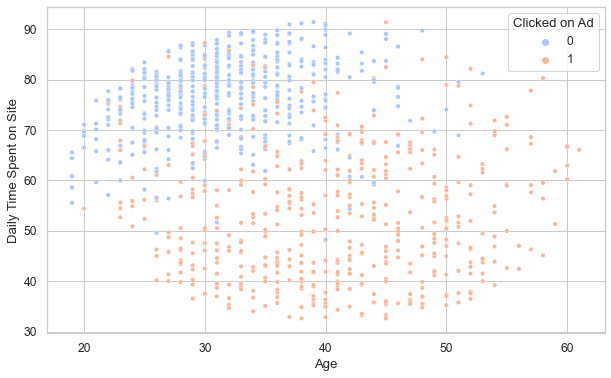

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= advertising, x= 'Age', y= 'Daily Time Spent on Site', hue= 'Clicked on Ad', palette = 'coolwarm', s = 20)

In [ ]:
# Consumers who click on ads, in general, spend less time on a site than those who do not click an ad

**Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

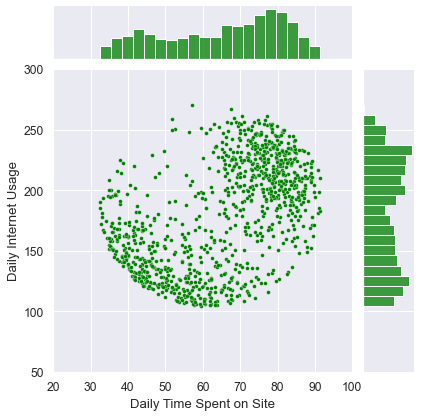

In [14]:
g = sns.jointplot(data= advertising, x= 'Daily Time Spent on Site', y= 'Daily Internet Usage', color = 'green', 
                  kind = 'scatter', joint_kws = dict(s = 15), marginal_kws = dict(bins =20))
g.ax_joint.set_xlim((20, 100))
g.ax_joint.set_ylim((50, 300));

In [15]:
# There is a peak in the data for consumers spending 73-85 minutes on a site daily and plotted against
# their time they spend on the internet daily, the average time is 190-230 minutes on the Internet.

# The data points also have a high density towards the lower part of the plot.

**Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

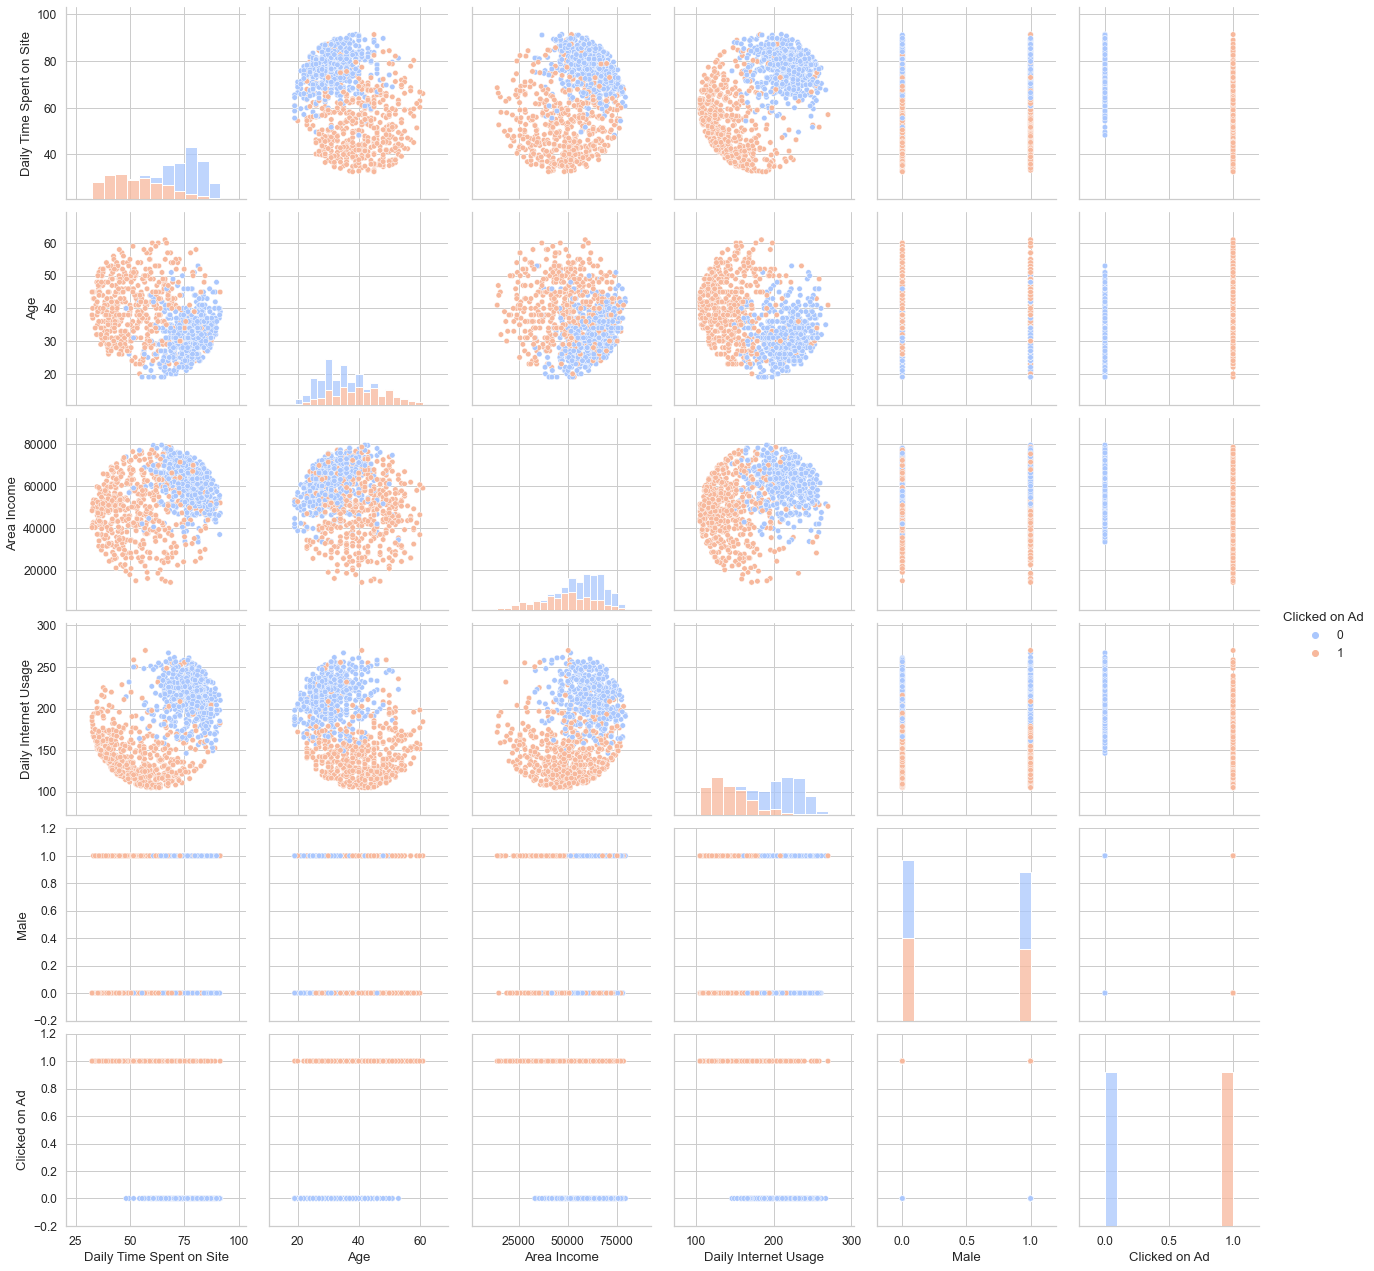

In [16]:
sns.set_style('whitegrid')

h = sns.pairplot(advertising, hue= 'Clicked on Ad', diag_kind= 'hist', 
                 vars= ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Clicked on Ad'],
                 height = 3, aspect= 1, palette= 'coolwarm', plot_kws={"s": 30}, diag_kws={'multiple': 'stack'})

for ax in h.axes.flat:
    ax.margins(x=0.2, y=0.2)
for ax in h.diag_axes:
    ax.margins(y=0.2)
plt.show()

In [18]:
# From the row containing scatterplots for Age vs Daily Time Spent on Site, we can see that the ages of the people vary from 
# young to old, but the consumers who click on ads tend to spend less time on the Internet daily than those who do not click on 
# the ads. 
# We have a similar trend for Age vs Area income.  The ages of consumers that click on ads vary from young to older people, but 
# the consumers that click on ads tends to come from a variety of average area income areas.  Consumers that do not click on ads
# tend to come from higher area income areas.

# Overall, we can see that the data of consumers who click on ads (and those who do not click on ads) form clusters of 
# datapoints and they have distinguishable characteristics.

## Data pre-Processing:

In [19]:
null_vals = advertising.isnull().sum()
null_vals

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [20]:
# There is no null values in our data

In [21]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
# We have seen before that 4 of the variables are of the type 'object'.  The training data needs to be numerical, i.e. of the
# type 'int' or 'float'.
# The columns can be converted to a numerical type, which includes dummy variables, if we determine that the varaible add 
# significance to our data.

# If a variable does not add significance, we might want to drop the column or just select the columns that we want in our 
# training or test data.

In [23]:
advertising['Ad Topic Line'].nunique()

1000

In [24]:
# There is no significance in 1000 different topic lines, except if, at a later stage, Natural Language Processing can be 
# applied to the text to determine possible valuable information.

In [25]:
advertising['City'].nunique()

969

In [26]:
# There are nearly 1000 unique cities as well, which does not add significance to our data.

In [27]:
advertising['Country'].nunique()

237

In [28]:
# The 237 different countries where consumers are situated is not going to help us make more valuable deductions from the data.

In [29]:
advertising['Timestamp'].nunique()

1000

In [30]:
# The timestamp, as it is will likely be all at different times. 

In [31]:
import datetime as dt

In [32]:
advertising['Timestamp'] = advertising['Timestamp'].apply(lambda x: pd.to_datetime(str(x)))

In [35]:
# Creating a 'Dates' column
advertising['Dates'] = advertising['Timestamp'].dt.date

In [33]:
# Creating a 'Months' column
advertising['Months'] = advertising['Timestamp'].dt.month

In [34]:
# Creating a 'Years' column
advertising['Years'] = advertising['Timestamp'].dt.year

In [42]:
advertising['Dates']

0      2016-03-27
1      2016-04-04
2      2016-03-13
3      2016-01-10
4      2016-06-03
          ...    
995    2016-02-11
996    2016-04-22
997    2016-02-01
998    2016-03-24
999    2016-06-03
Name: Dates, Length: 1000, dtype: object

In [39]:
# There are 7 unique months in which consumers clicked on ads or did not click on ads

advertising['Months'].unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

In [40]:
# The data is only for the year 2016 January to July.

advertising['Years'].unique()

array([2016], dtype=int64)

In [44]:
# I will drop the year column, since it is only for the year 2016

advertising = advertising.drop('Years', axis = 1)

In [45]:
advertising.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Months,Dates
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,3,2016-03-27
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,4,2016-04-04
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,3,2016-03-13
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,1,2016-01-10
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,6,2016-06-03


In [46]:
corr_data = advertising.corr()
corr_data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Months
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117,-0.010920
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531,0.023689
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255,-0.050216
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539,0.017530
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027,0.005220
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000,0.016095
Months,-0.010920,0.023689,-0.050216,0.017530,0.005220,0.016095,1.000000


<AxesSubplot:>

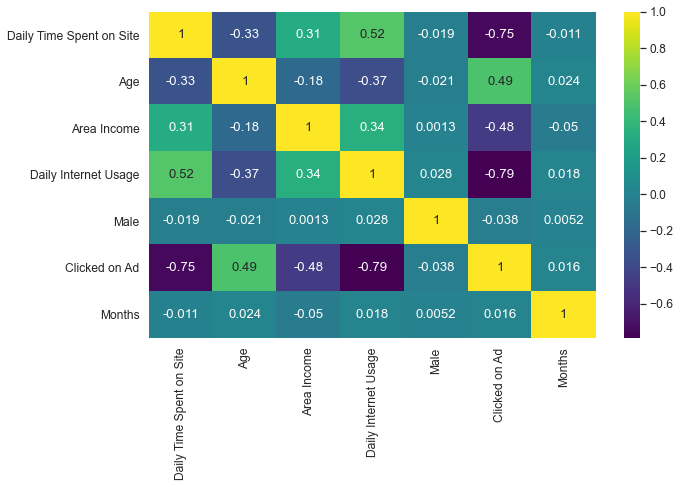

In [47]:
plt.figure(figsize = (10,6))
sns.heatmap(corr_data, cmap = 'viridis', annot = True)

In [ ]:
# From the correlations above, we can see that the months in which an ad was clicked, does not have a correlation with any of 
# the other variables.

# We can see that there is a fairly strong negative correlation between 'Clicking on an ad' and 'Daily time spent on a site' or 
# 'Daily Internet Usage', which indicates that consumers who clicks on ads, in general, spend less time on the internet and less
# time on a site.

#### We will thus not use the 'Months' column in our training data.
#### We will use all the other numeric columns for our training and testing data.

#### More Exploratory Data Analysis can be done to find valuable information in the data, but for the scope of this project, we want to ultimately understand the data and train it on a Logistic Regression Model.

## Logistic Regression Model training

**Split the data into training set and test set.**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = advertising[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = advertising['Clicked on Ad']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.33, random_state = 101)

**Train and fit a logistic regression model on the training set.**

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions and Evaluations

**Predict values for the testing data.**

In [54]:
preds = logmodel.predict(X_test)

**Create a classification report for the model.**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



## Conclusion:

#### This is a very good model to make predictions on both consumers who did not click on an ad and those who did click on an ad.